In [ ]:
!pip install textblob nltk vaderSentiment
nltk.download('punkt')

In [1]:
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

#device = 0 if torch.cuda.is_available() else -1
#device

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#filepath = r"combined_dfv4.csv"
filepath = r"Models comparison summary.xlsx"
#df = pd.read_csv(filepath, dtype=str).sort_values(by='Survey ID')
#read df_mar tab from excel file
df_mar=pd.read_excel(filepath, sheet_name='df_mar')
df_apr=pd.read_excel(filepath, sheet_name='df_apr')

#df
#df['combined_text'] = df['combined_text'].astype(str)
df_mar['Combined Text'] = df_mar['Combined Text'].astype(str)
df_apr['Combined Text'] = df_apr['Combined Text'].astype(str)


 Text Blob/
 TextBlob Naive Bayes/
 NLTK VADER

In [4]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def textblob_naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

def nltk_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [11]:
import pandas as pd

df['token_count'] = df['token_count'].astype(int)
sampled_df = df[df['Survey language'] == 'English']
sampled_df = sampled_df[(sampled_df['Month of Response Date'] == 'Mar-24') & (sampled_df['token_count'] < 10)].sample(n=1000, random_state=42)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
sampled_df.to_excel('sampled_df[WD]v2.xlsx', index=False)

In [4]:
sampled_df=pd.read_excel('sampled_df[WD]_eng.xlsx')

In [13]:
#sampled_df = df.sample(n=1000, random_state=42)
#sampled_df=pd.read_csv('sentiment_analysis_output[WD].csv')
#sampled_df['Combined Text'] = sampled_df['Combined Text'].astype(str)

In [12]:
sampled_df['TextBlob_Sentiment'] = sampled_df['Combined Text'].apply(textblob_sentiment)

sampled_df['TextBlob_NaiveBayes_Sentiment'] = sampled_df['Combined Text'].apply(textblob_naive_bayes_sentiment)
#25mins for 1000 rows

sampled_df['NLTK_Vader_Sentiment'] = sampled_df['Combined Text'].apply(nltk_vader_sentiment)

In [5]:
#####for meichi's table

#TB
df_mar['TextBlob_Sentiment'] = df_mar['Combined Text'].apply(textblob_sentiment)
df_apr['TextBlob_Sentiment'] = df_apr['Combined Text'].apply(textblob_sentiment)
#VADER
df_mar['NLTK_Vader_Sentiment'] = df_mar['Combined Text'].apply(nltk_vader_sentiment)
df_apr['NLTK_Vader_Sentiment'] = df_apr['Combined Text'].apply(nltk_vader_sentiment)

#sampled_df['TextBlob_NaiveBayes_Sentiment'] = sampled_df['Combined Text'].apply(textblob_naive_bayes_sentiment)
#25mins for 1000 rows

#sampled_df['NLTK_Vader_Sentiment'] = sampled_df['Combined Text'].apply(nltk_vader_sentiment)

In [13]:
sampled_df.to_excel('Basic_SA_Mar_eng.xlsx', index=False)

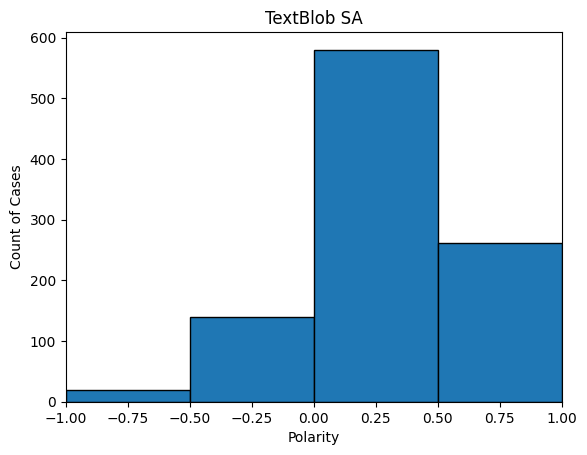

In [14]:
import matplotlib.pyplot as plt
import numpy as np  
# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['TextBlob_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('TextBlob SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

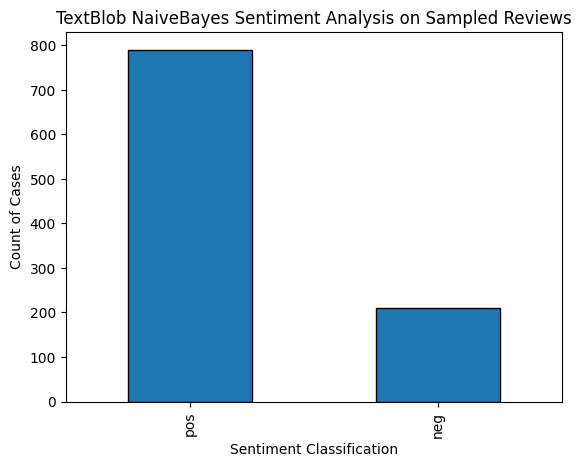

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment classification
sentiment_counts = sampled_df['TextBlob_NaiveBayes_Sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', edgecolor='black')

# Set the labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Count of Cases')
plt.title('TextBlob NaiveBayes Sentiment Analysis on Sampled Reviews')

# Show the plot
plt.show()

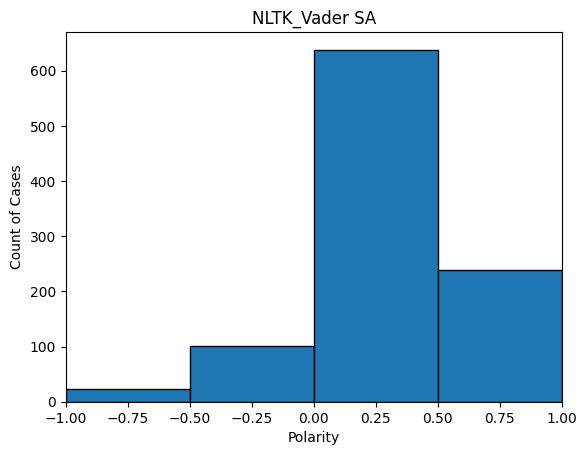

In [16]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['NLTK_Vader_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('NLTK_Vader SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

Post SA Output Representation & Evaluation

In [6]:
df_annotated=pd.read_excel("sampled_df[WD]_eng.xlsx")

In [7]:
###########get df after sentiment analysis
#df_sa=pd.read_csv('sentiment_analysis_output[WD].csv')
#df_sa=pd.read_csv('SA output v2[WD].csv')
df_sa=pd.read_excel('Basic_SA_Mar_eng.xlsx')

df_sa['Sentiment_Label_TB'] = df_sa['TextBlob_Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
df_sa['Sentiment_Label_TB_NB'] = df_sa['TextBlob_NaiveBayes_Sentiment'].apply(lambda x: 'Positive' if x == 'pos' else 'Negative')
df_sa['Sentiment_Label_VADER'] = df_sa['NLTK_Vader_Sentiment'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


In [8]:
print(df_annotated['True_label'].value_counts())

True_label
Positive    649
Negative    305
Neutral      44
Name: count, dtype: int64


In [9]:
df_sa['Survey ID'] = df_sa['Survey ID'].astype(str)
df_annotated['Survey ID'] = df_annotated['Survey ID'].astype(str)

#join df_sa with sampled_df[WD] using survey ID
df_sa = pd.merge(df_sa, df_annotated[['Survey ID', 'True_label']], on='Survey ID', how='inner')
df_sa

,Survey ID,Product Name,Print Customer Region,LTR,Source Type,Survey language,Review Source,Star Rating,Product Family,Supplies Family,...,Delivery,Price,Product Quality,TextBlob_Sentiment,TextBlob_NaiveBayes_Sentiment,NLTK_Vader_Sentiment,Sentiment_Label_TB,Sentiment_Label_TB_NB,Sentiment_Label_VADER,True_label
0,369908279,HP DeskJet 2723e All-in-One Printer,NO,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Obelisk,...,NaN,NaN,NaN,-0.071429,pos,-0.2960,Negative,Positive,Negative,Positive
1,378561533,HP 67XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Staples,5.0,Supplies - Ink,Obelisk,...,NaN,NaN,NaN,0.433333,pos,0.4404,Positive,Positive,Positive,Positive
2,370358579,HP 64 Black Original Ink Cartridge,US,8,Web Reviews,English,Amazon US,4.0,Supplies - Ink,Centaur,...,NaN,NaN,NaN,0.700000,pos,0.7717,Positive,Positive,Positive,Positive
3,371841554,HP 952 Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Supernesta,...,Delivery,NaN,NaN,0.700000,pos,0.4404,Positive,Positive,Positive,Positive
4,372495776,HP 62 Black Original Ink Cartridge,US,10,Web Reviews,English,HP US,5.0,Supplies - Ink,Minotaur,...,Delivery,NaN,NaN,0.250000,neg,0.0000,Positive,Negative,Neutral,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,371521729,HP 902XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Makeda,...,Delivery,NaN,NaN,0.500000,pos,0.7840,Positive,Positive,Positive,Positive
994,377490882,HP 910XL High Yield Black/910 Cyan/Magenta/Yel...,US,10,Web Reviews,English,Staples,5.0,Supplies - Ink,Cedella,...,Delivery,NaN,NaN,0.800000,pos,0.6249,Positive,Positive,Positive,Positive
995,372826146,HP 65XL Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Dolmen Refresh,...,NaN,NaN,NaN,0.000000,pos,0.0000,Neutral,Positive,Neutral,Positive
996,373751855,HP 951XL High Yield Magenta Original Ink Cartr...,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Nesta+,...,NaN,Price,NaN,0.750000,pos,0.7650,Positive,Positive,Positive,Positive


Comparing SA output with True label (From LTR/star rating score)

In [37]:
#redefine the "true label" - adjust threshold
def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 6:
            return 'Negative'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star_Rating (1-5)
        if row['Star_Rating'] <= 3:
            return 'Negative'
        else:
            return 'Positive'
    else:
        return 'Unknown'  
    
df_sa['True_label'] = df_sa.apply(score_to_sentiment, axis=1)


#print(df_sa[['LTR', 'Star Rating', 'True_label']].sample(20))
#print random enties to validate the labels


In [38]:
textblob_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB'])
print("TextBlob Accuracy:", textblob_accuracy)

textblobnb_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB_NB'])
print("TextBlob NB Accuracy:", textblobnb_accuracy)

vader_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_VADER'])
print("VADER Accuracy:", vader_accuracy)

#past
#textblob_accuracy = 0.504
#textblobnb_accuracy = 0.56
#vader_accuracy = 0.596


TextBlob Accuracy: 0.5763598326359832
TextBlob NB Accuracy: 0.647489539748954
VADER Accuracy: 0.5502092050209205


  True_label  TextBlob  TextBlob_NB     VADER
0   Negative  0.383966     0.202532  0.345992
1   Positive  0.639777     0.794159  0.617524


C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\641880010.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\641880010.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] 

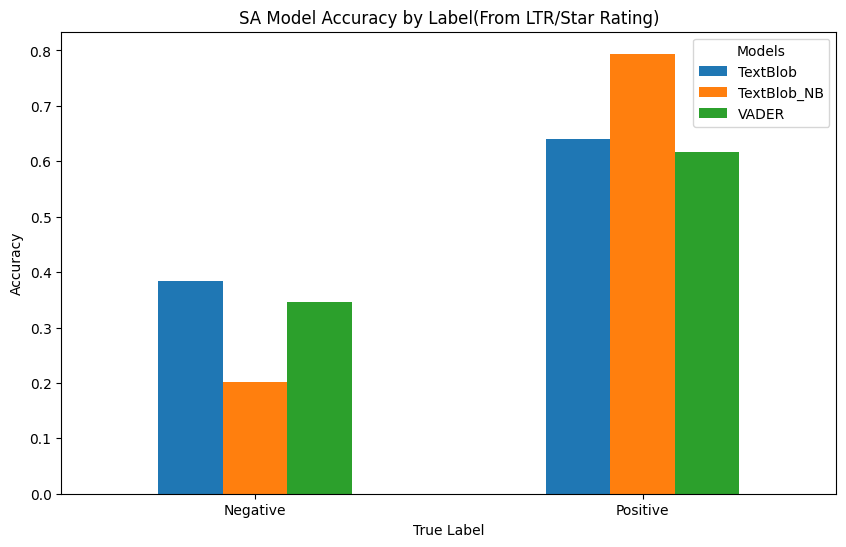

In [39]:
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB_NB', 'True_label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'TextBlob_NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by Label(From LTR/Star Rating)')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Comparing with True_label (Manually annotated @1000 samples)

In [11]:
df_sa['True_label'] = df_sa['True_label'].astype(str)
#filter those with True_label = 'Positive' or 'Negativel, no null value (annotated)
df_sa = df_sa[(df_sa['True_label'] == 'Positive') | (df_sa['True_label'] == 'Negative')]
df_sa['Sentiment_Label_TB'] = df_sa['Sentiment_Label_TB'].astype(str)
df_sa['Sentiment_Label_TB_NB'] = df_sa['Sentiment_Label_TB_NB'].astype(str)
df_sa['Sentiment_Label_VADER'] = df_sa['Sentiment_Label_VADER'].astype(str)

textblob_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB'])
print("TextBlob Accuracy:", textblob_accuracy)

textblobnb_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB_NB'])
print("TextBlob NB Accuracy:", textblobnb_accuracy)

vader_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_VADER'])
print("VADER Accuracy:", vader_accuracy)

TextBlob Accuracy: 0.5670859538784067
TextBlob NB Accuracy: 0.6121593291404612
VADER Accuracy: 0.5482180293501048


C:\Users\Admin\AppData\Local\Temp\ipykernel_14244\3767527751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa['Sentiment_Label_TB'] = df_sa['Sentiment_Label_TB'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14244\3767527751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa['Sentiment_Label_TB_NB'] = df_sa['Sentiment_Label_TB_NB'].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14244\3767527751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

  True_label  TextBlob  TextBlob_NB     VADER
0   Negative  0.357377     0.213115  0.308197
1   Positive  0.665639     0.799692  0.661017


C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\2962440940.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\2962440940.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col

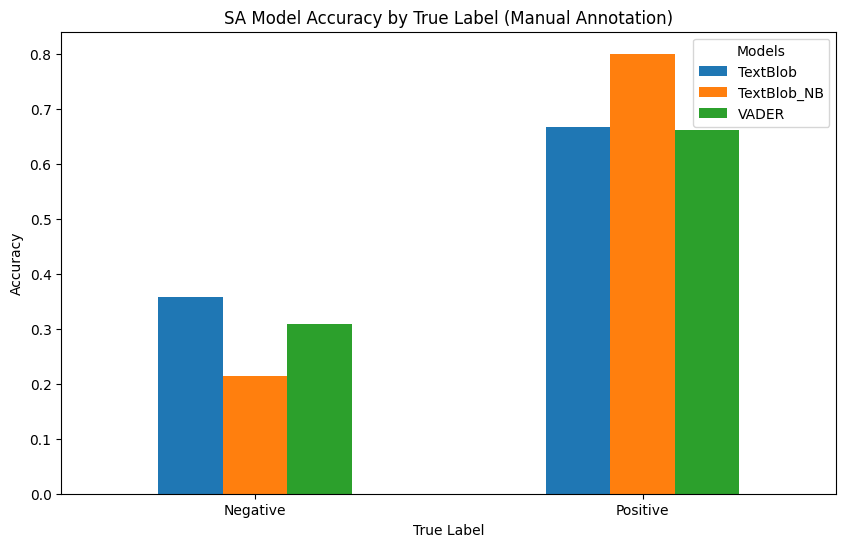

In [45]:
import matplotlib.pyplot as plt
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB_NB', 'True_label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'TextBlob_NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by True Label (Manual Annotation)')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Train NB using True_Label (manually annotated)

Naive Bayes accuracy: 0.8272251308900523
Naive Bayes classification report:
              precision    recall  f1-score   support

    Negative       0.84      0.59      0.70        64
    Positive       0.82      0.94      0.88       127

    accuracy                           0.83       191
   macro avg       0.83      0.77      0.79       191
weighted avg       0.83      0.83      0.82       191



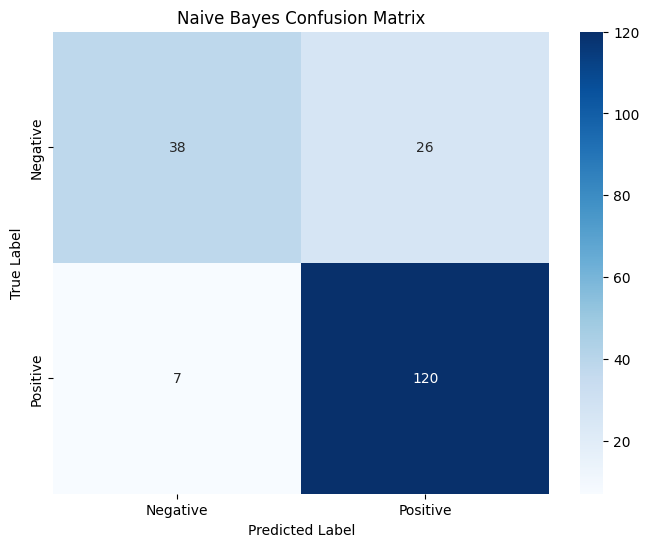

In [12]:
# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_label']

# Split dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to a numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_vectorized = vectorizer.transform(X_test)        # Transform on test data

# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = nb_model.predict(X_test_vectorized)

# Add the predicted labels back to the original df_sa DataFrame
df_sa.loc[X_test.index, 'Predicted_Label_NB'] = y_pred
# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

y_pred = nb.predict(X_test_vectorized)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes classification report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

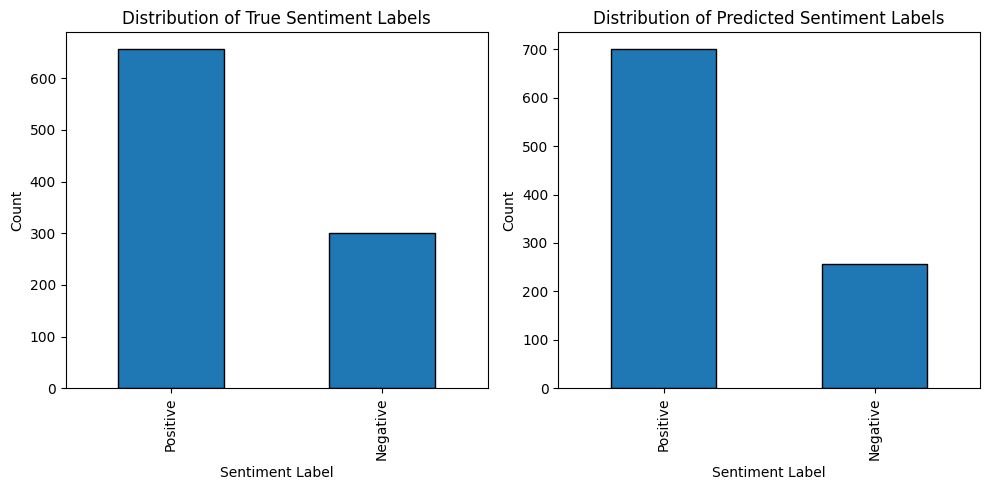

In [38]:
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each sentiment label in the True_Label and Predicted_Label_NB columns
true_label_counts = df_sa['True_label'].value_counts()
predicted_label_counts = df_sa['Predicted_Label_NB'].value_counts()

# Step 2: Plot the distribution using a bar chart

# Plot the distribution of True Labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
true_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of True Sentiment Labels')

# Plot the distribution of Predicted Labels
plt.subplot(1, 2, 2)
predicted_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiment Labels')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
textblobnb_accuracy_afterTrain = accuracy_score(df_sa['True_label'], df_sa['Predicted_Label_NB'])
print("NB Accuracy:", textblobnb_accuracy_afterTrain)

In [82]:
textblobnb_accuracy_afterTrain = accuracy_score(df_sa['True_label'], df_sa['Predicted_Label_NB'])
print("TextBlob NB New Accuracy:", textblobnb_accuracy_afterTrain)
#past 0.805

TextBlob NB New Accuracy: 0.848


In [53]:
df_sa.to_csv('SA_review_predicted_output.csv', index=False)

SVM


SVM Model Accuracy: 0.858639
              precision    recall  f1-score   support

    Negative       0.84      0.72      0.77        64
    Positive       0.87      0.93      0.90       127
     Neutral       0.00      0.00      0.00         0

    accuracy                           0.86       191
   macro avg       0.57      0.55      0.56       191
weighted avg       0.86      0.86      0.86       191



C:\Users\Admin\AppData\Local\Temp\ipykernel_14244\1998671535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sa['Sentiment_Label_Numeric'] = df_sa['True_label'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

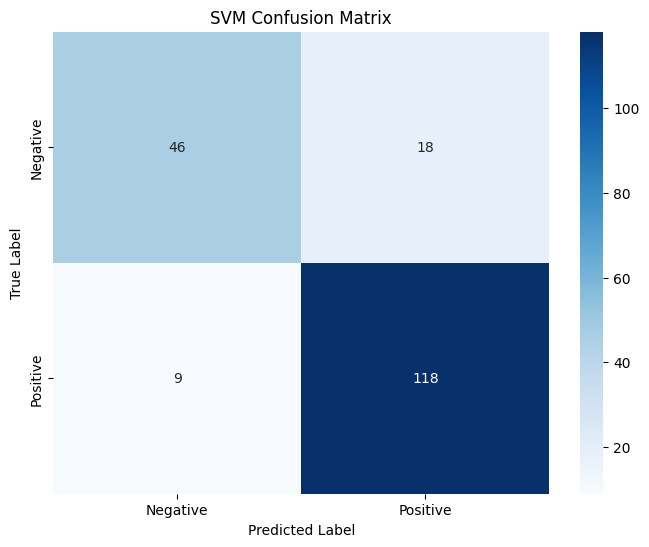

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Define a TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the text data to numerical features
X = tfidf.fit_transform(df_sa['Combined Text']).toarray()

# Target labels: Encode sentiment labels as numerical values
df_sa['Sentiment_Label_Numeric'] = df_sa['True_label'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})
y = df_sa['Sentiment_Label_Numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Support Vector Classifier (SVC) with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)
# Predict sentiment on the test set
y_pred = svm_model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.6f}")

# Print classification report
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=['Negative', 'Positive', 'Neutral']))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM Model Accuracy: 0.68
              precision    recall  f1-score   support

    Negative       0.62      0.73      0.67        59
    Positive       0.73      0.89      0.80       105
     Neutral       0.00      0.00      0.00        36

    accuracy                           0.68       200
   macro avg       0.45      0.54      0.49       200
weighted avg       0.57      0.68      0.62       200



In [36]:
new_datasets = {'df_mar': df_mar, 'df_apr': df_apr}

In [37]:
for name, new_df in new_datasets.items():
    # Transform the 'combined_text' column using the trained CountVectorizer (for Naive Bayes)
    new_data_vectorized_nb = vectorizer.transform(new_df['Combined Text'])

    # Predict labels using the trained Naive Bayes model
    new_df['Predicted_Label_NB'] = nb_model.predict(new_data_vectorized_nb)

    # Transform the 'combined_text' column using the trained TF-IDF Vectorizer (for SVM)
    new_data_vectorized_svm = tfidf.transform(new_df['Combined Text']).toarray()

    # Predict labels using the trained SVM model
    new_df['Predicted_Label_SVM'] = svm_model.predict(new_data_vectorized_svm)


In [38]:
label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

# Apply the mapping to the 'Predicted_Label_SVM' column
df_mar['Predicted_Label_SVM'] = df_mar['Predicted_Label_SVM'].map(label_mapping)
df_apr['Predicted_Label_SVM'] = df_apr['Predicted_Label_SVM'].map(label_mapping)

def map_textblob_sentiment(score):
    return 'Positive' if score > 0 else 'Negative'

def map_vader_sentiment(score):
    return 'Positive' if score > 0 else 'Negative'

# Apply the functions to the respective columns
df_mar['TextBlob_Label'] = df_mar['TextBlob_Sentiment'].apply(map_textblob_sentiment)
df_mar['Vader_Label'] = df_mar['NLTK_Vader_Sentiment'].apply(map_vader_sentiment)

df_apr['TextBlob_Label'] = df_apr['TextBlob_Sentiment'].apply(map_textblob_sentiment)
df_apr['Vader_Label'] = df_apr['NLTK_Vader_Sentiment'].apply(map_vader_sentiment)


In [43]:
df_mar.to_excel('SA_output_mar[Wudi].xlsx', index=False)
df_apr.to_excel('SA_output_apr.xlsx[Wudi].xlsx', index=False)

SA Model test on NLI output

In [48]:
import pandas as pd
nli_data_roberta=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli3_roberta_df_results.csv')
nli_data_msBert=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli2_msoftbert_df_results.csv')
nli_data_fbbart=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli1_fbbart_df_results.csv')

nli_data_fbbart['polarity'] = nli_data_fbbart['polarity'].str.capitalize()
nli_data_msBert['polarity'] = nli_data_msBert['polarity'].str.capitalize()
nli_data_roberta['polarity'] = nli_data_roberta['polarity'].str.capitalize()

In [49]:
df = nli_data_roberta[['sentence', 'polarity','Survey ID','cat']]
df1=nli_data_msBert[['sentence', 'polarity','Survey ID','cat']]
df2=nli_data_fbbart[['sentence', 'polarity','Survey ID','cat']]

# Vectorize the sentences (use the same vectorizer as during training)
X_nli_nb = vectorizer.transform(df['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm = tfidf.transform(df['sentence'])  # Use the SVM vectorizer

#df1
X_nli_nb1 = vectorizer.transform(df1['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm1 = tfidf.transform(df1['sentence'])  # Use the SVM vectorizer

#df2
X_nli_nb2 = vectorizer.transform(df2['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm2 = tfidf.transform(df2['sentence'])  # Use the SVM vectorizer

# Make predictions using the SVM and Naive Bayes models
df['SVM_Predicted'] = svm_model.predict(X_nli_svm.toarray())
df['NB_Predicted'] = nb_model.predict(X_nli_nb)

df1['SVM_Predicted'] = svm_model.predict(X_nli_svm1.toarray())
df1['NB_Predicted'] = nb_model.predict(X_nli_nb1)

df2['SVM_Predicted'] = svm_model.predict(X_nli_svm2.toarray())
df2['NB_Predicted'] = nb_model.predict(X_nli_nb2)

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming the following mapping based on your initial mapping of labels
label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

# Create new columns for mapped predictions
df['SVM_Predicted'] = df['SVM_Predicted'].map(label_mapping)
df1['SVM_Predicted'] = df1['SVM_Predicted'].map(label_mapping)
df2['SVM_Predicted'] = df2['SVM_Predicted'].map(label_mapping)

In [51]:
# Calculate discrepancy between SVM and polarity Label (from NLI)
svm_accuracy = accuracy_score(df['polarity'], df['SVM_Predicted'])
print(f"SVM Model Accuracy for roberta: {svm_accuracy}")
nb_accuracy = accuracy_score(df['polarity'], df['NB_Predicted'])
print(f"Naive Bayes Model Accuracy roberta: {nb_accuracy}")

print("-------------------------------------------------")
#msbert
svm_accuracy_msbert = accuracy_score(df1['polarity'], df1['SVM_Predicted'])
print(f"SVM Model Accuracy for msbert: {svm_accuracy_msbert}")
nb_accuracy_ms = accuracy_score(df1['polarity'], df1['NB_Predicted'])
print(f"Naive Bayes Model Accuracy msbert: {nb_accuracy_ms}")

print("-------------------------------------------------")
#fbart

svm_accuracy_fb = accuracy_score(df2['polarity'], df2['SVM_Predicted'])
print(f"SVM Model Accuracy for fbbart: {svm_accuracy_fb}")
nb_accuracy_fb = accuracy_score(df2['polarity'], df2['NB_Predicted'])
print(f"Naive Bayes Model Accuracy fbbart: {nb_accuracy_fb}")


SVM Model Accuracy for roberta: 0.7364026717557252
Naive Bayes Model Accuracy roberta: 0.7056297709923665
-------------------------------------------------
SVM Model Accuracy for msbert: 0.7105061349693251
Naive Bayes Model Accuracy msbert: 0.6869248466257669
-------------------------------------------------
SVM Model Accuracy for fbbart: 0.716156462585034
Naive Bayes Model Accuracy fbbart: 0.680952380952381


In [52]:
# Calculate discrepancy between SVM and polarity Label (from NLI)
svm_accuracy = accuracy_score(df['polarity'], df['SVM_Predicted'])
print(f"SVM Model Accuracy for roberta: {svm_accuracy}")
nb_accuracy = accuracy_score(df['polarity'], df['NB_Predicted'])
print(f"Naive Bayes Model Accuracy roberta: {nb_accuracy}")

print("-------------------------------------------------")
#msbert
svm_accuracy_msbert = accuracy_score(df1['polarity'], df1['SVM_Predicted'])
print(f"SVM Model Accuracy for msbert: {svm_accuracy_msbert}")
nb_accuracy_ms = accuracy_score(df1['polarity'], df1['NB_Predicted'])
print(f"Naive Bayes Model Accuracy msbert: {nb_accuracy_ms}")

print("-------------------------------------------------")
#fbart

svm_accuracy_fb = accuracy_score(df2['polarity'], df2['SVM_Predicted'])
print(f"SVM Model Accuracy for fbbart: {svm_accuracy_fb}")
nb_accuracy_fb = accuracy_score(df2['polarity'], df2['NB_Predicted'])
print(f"Naive Bayes Model Accuracy fbbart: {nb_accuracy_fb}")


SVM Model Accuracy for roberta: 0.7364026717557252
Naive Bayes Model Accuracy roberta: 0.7056297709923665
-------------------------------------------------
SVM Model Accuracy for msbert: 0.7105061349693251
Naive Bayes Model Accuracy msbert: 0.6869248466257669
-------------------------------------------------
SVM Model Accuracy for fbbart: 0.716156462585034
Naive Bayes Model Accuracy fbbart: 0.680952380952381


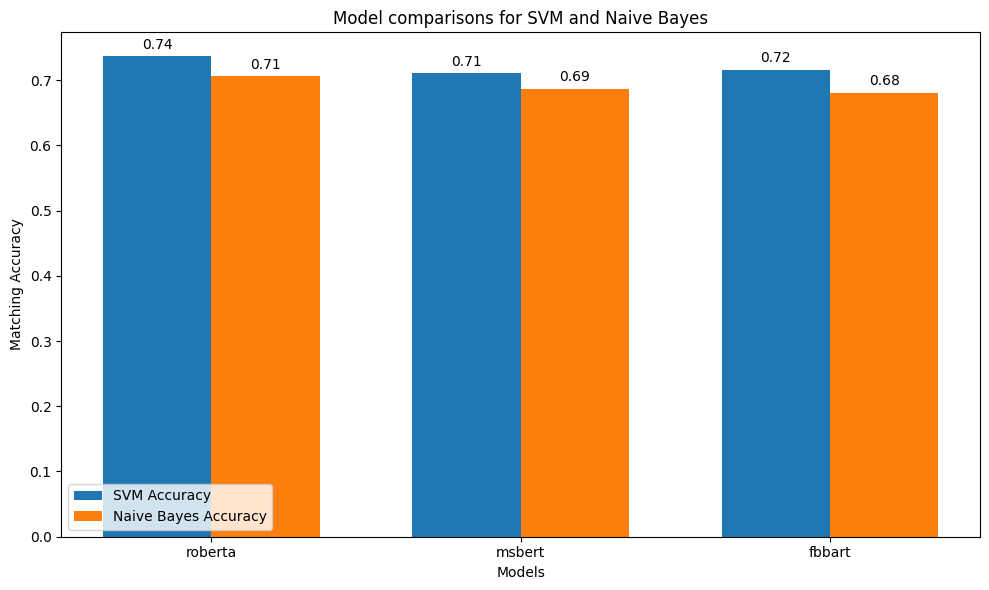

In [54]:
import matplotlib.pyplot as plt

# Data preparation
models = ['roberta', 'msbert', 'fbbart']
svm_accuracies = [0.7364026717557252, 0.7105061349693251, 0.716156462585034]
nb_accuracies = [0.7056297709923665, 0.6869248466257669, 0.680952380952381]

# Plotting
x = range(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.35

# Plot bars
rects1 = ax.bar(x, svm_accuracies, width, label='SVM Accuracy')
rects2 = ax.bar([p + width for p in x], nb_accuracies, width, label='Naive Bayes Accuracy')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Models')
ax.set_ylabel('Matching Accuracy')
ax.set_title('Model comparisons for SVM and Naive Bayes')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels
add_labels(rects1)
add_labels(rects2)

# Show plot
plt.tight_layout()
plt.show()

In [25]:
df.to_csv('SA Model Output/roberta_output.csv', index=False)
df1.to_csv('SA Model Output/msbert_output.csv', index=False)
df2.to_csv('SA Model Output/fbbart_output.csv', index=False)

Training dataset for df_mar and df_apr

Comparing NLI Results with True label (Sample size:500)

In [24]:
#read nli-all excel from multi-turn zero-shot
nli_data=pd.read_excel(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli-all.xlsx')

#join nli_data with df_annotated
nli_data['Survey ID'] = nli_data['Survey ID'].astype(str)
df_annotated['Survey ID'] = df_annotated['Survey ID'].astype(str)

nli_data_with_annotation = pd.merge(nli_data, df_annotated[['Survey ID', 'True_label']], on='Survey ID', how='inner')

#capitalise all polarity
nli_data_with_annotation['polarity-roberta'] = nli_data_with_annotation['polarity-roberta'].str.capitalize()
nli_data_with_annotation['polarity-ms'] = nli_data_with_annotation['polarity-ms'].str.capitalize()
nli_data_with_annotation['polarity-fb'] = nli_data_with_annotation['polarity-fb'].str.capitalize()

#filter out those with no null value (annotated) and True_label = 'Positive' or 'Negative' or neutral
nli_data_with_annotation = nli_data_with_annotation[(nli_data_with_annotation['True_label'] == 'Positive') | (nli_data_with_annotation['True_label'] == 'Negative') | (nli_data_with_annotation['True_label'] == 'Neutral')]

nli_data_with_annotation
#nli_data_with_annotation.to_csv('SA Model Output/nli_all_output.csv', index=False)

,Survey ID,cat,polarity-roberta,polarity-ms,polarity-fb,sentence,True_label
0,110317001,Others,Positive,Neutral,Positive,Order came very quick!,Positive
1,117483634,Others,Negative,Positive,Negative,Good but expensive but this is Biden' fault,Neutral
2,118156397,Price,Positive,Positive,Positive,Great price and delivery right to my front door!,Positive
3,118156397,Product Quality,Positive,Positive,Positive,Great price and delivery right to my front door!,Positive
4,118156397,Delivery,Positive,Positive,Positive,Great price and delivery right to my front door!,Positive
...,...,...,...,...,...,...,...
494,50598923,Product Quality,Positive,Positive,Positive,"Great price, reliable product.",Positive
495,73746308,Others,Negative,Neutral,Negative,What could possibly go wrong ???,Positive
496,73746783,Price,Positive,Positive,Positive,I use this for my printer. Great price!,Positive
497,93843989,Price,Positive,Positive,Positive,Fast shipping and good price,Positive


In [30]:
nli_data_with_annotation=pd.read_csv('SA Model Output/nli_all_output.csv')

In [31]:
#calculate the accuracy of polarity from NLI vs the True_label
nli_accuracy_roberta = accuracy_score(nli_data_with_annotation['True_label'], nli_data_with_annotation['polarity-roberta'])
print(f"Roberta NLI Accuracy: {nli_accuracy_roberta}")
nli_accuracy_fb = accuracy_score(nli_data_with_annotation['True_label'], nli_data_with_annotation['polarity-fb'])
print(f"Facebook Bart NLI Accuracy: {nli_accuracy_fb}")
nli_accuracy_ms = accuracy_score(nli_data_with_annotation['True_label'], nli_data_with_annotation['polarity-ms'])
print(f"Microsoft Bert NLI Accuracy: {nli_accuracy_ms}")


Roberta NLI Accuracy: 0.8977955911823647
Facebook Bart NLI Accuracy: 0.9078156312625251
Microsoft Bert NLI Accuracy: 0.8496993987975952


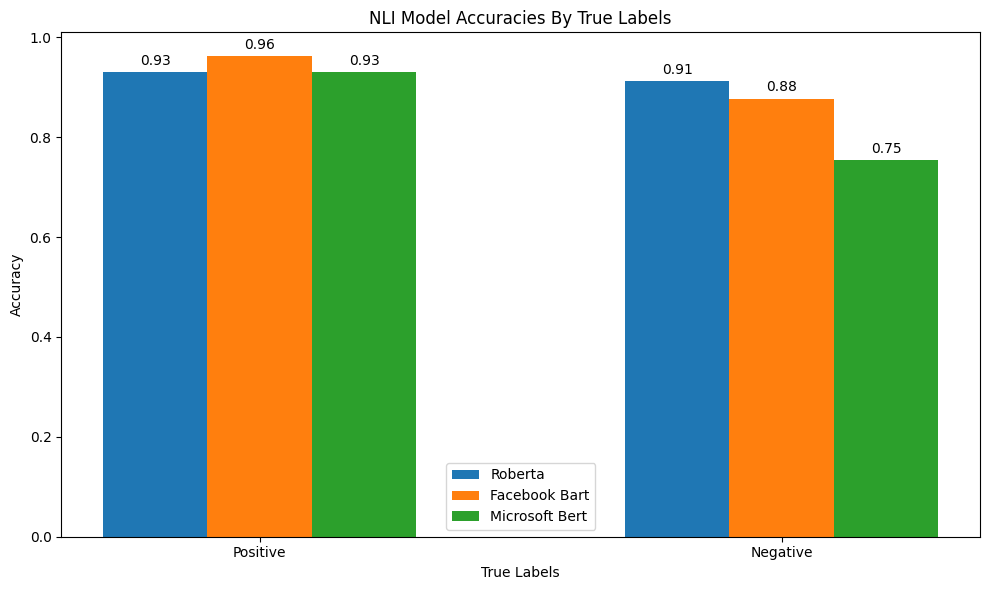

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming nli_data_with_annotation is your DataFrame

# Filter data for positive and negative labels
positive_data = nli_data_with_annotation[nli_data_with_annotation['True_label'] == 'Positive']
negative_data = nli_data_with_annotation[nli_data_with_annotation['True_label'] == 'Negative']

# Calculate accuracy for positive labels
nli_accuracy_roberta_pos = accuracy_score(positive_data['True_label'], positive_data['polarity-roberta'])
nli_accuracy_fb_pos = accuracy_score(positive_data['True_label'], positive_data['polarity-fb'])
nli_accuracy_ms_pos = accuracy_score(positive_data['True_label'], positive_data['polarity-ms'])

# Calculate accuracy for negative labels
nli_accuracy_roberta_neg = accuracy_score(negative_data['True_label'], negative_data['polarity-roberta'])
nli_accuracy_fb_neg = accuracy_score(negative_data['True_label'], negative_data['polarity-fb'])
nli_accuracy_ms_neg = accuracy_score(negative_data['True_label'], negative_data['polarity-ms'])

# Prepare data for plotting
labels = ['Positive', 'Negative']
roberta_accuracies = [nli_accuracy_roberta_pos, nli_accuracy_roberta_neg]
fb_accuracies = [nli_accuracy_fb_pos, nli_accuracy_fb_neg]
ms_accuracies = [nli_accuracy_ms_pos, nli_accuracy_ms_neg]

# Plotting
x = range(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.2

# Plot bars
rects1 = ax.bar([p - width for p in x], roberta_accuracies, width, label='Roberta')
rects2 = ax.bar(x, fb_accuracies, width, label='Facebook Bart')
rects3 = ax.bar([p + width for p in x], ms_accuracies, width, label='Microsoft Bert')

# Add some text for labels, title and axes ticks
ax.set_xlabel('True Labels')
ax.set_ylabel('Accuracy')
ax.set_title('NLI Model Accuracies By True Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show plot
plt.tight_layout()
plt.show()

BACKUPS

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Evaluate the best model
best_pred = best_svm_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print(f"Best SVM Model Accuracy: {best_accuracy:.2f}")


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best SVM Model Accuracy: 0.69


In [36]:
# Transform the 'text' column of df_sa into TF-IDF features
X_sa = tfidf.transform(sampled_df['Combined Text']).toarray()

# Predict the sentiment labels using the trained SVM model
sampled_df['SVM_Predicted'] = svm_model.predict(X_sa)

# Map the numeric predictions back to sentiment labels ('Positive', 'Negative', 'Neutral')
sampled_df['SVM_Predicted_Label'] = sampled_df['SVM_Predicted'].map({1: 'Positive', 0: 'Negative', 2: 'Neutral'})

# Display the first few predictions
print(sampled_df[['Combined Text', 'SVM_Predicted_Label']].head())


                                           Combined Text SVM_Predicted_Label
25588  Because I have some difficulties to use it and...            Negative
30810  Bought a few weeks ago. Easy to install. Excel...            Positive
61411          Only recommend original HP ink! Best ink!            Positive
49186  IT was fine until it wasn't. The copies were g...            Positive
42104  The HP Ink service has charged me on 2 differe...            Negative


In [37]:
SVM_accuracy_afterTrain_onothersample = accuracy_score(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'])
print("SVM Overall Accuracy:", SVM_accuracy_afterTrain_onothersample)

SVM Overall Accuracy: 0.656


In [38]:
sampled_df.to_csv('SA_Random_Samples.csv', index=False)

Overall Compare for ML methods

In [43]:
from sklearn.metrics import classification_report

# Classification report for SVM
print("SVM Classification Report:")
svm_report = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'])
print(svm_report)

# Classification report for Naive Bayes
print("Naive Bayes Classification Report:")
nb_report = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'])
print(nb_report)

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.60      0.58       288
     Neutral       0.18      0.03      0.05       148
    Positive       0.71      0.85      0.78       564

    accuracy                           0.66      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.59      0.66      0.61      1000

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.60      0.60       288
     Neutral       0.12      0.03      0.04       148
    Positive       0.71      0.86      0.78       564

    accuracy                           0.66      1000
   macro avg       0.48      0.50      0.47      1000
weighted avg       0.59      0.66      0.62      1000



In [46]:
# Extract classification report as a dictionary
svm_report_dict = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
nb_report_dict = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)


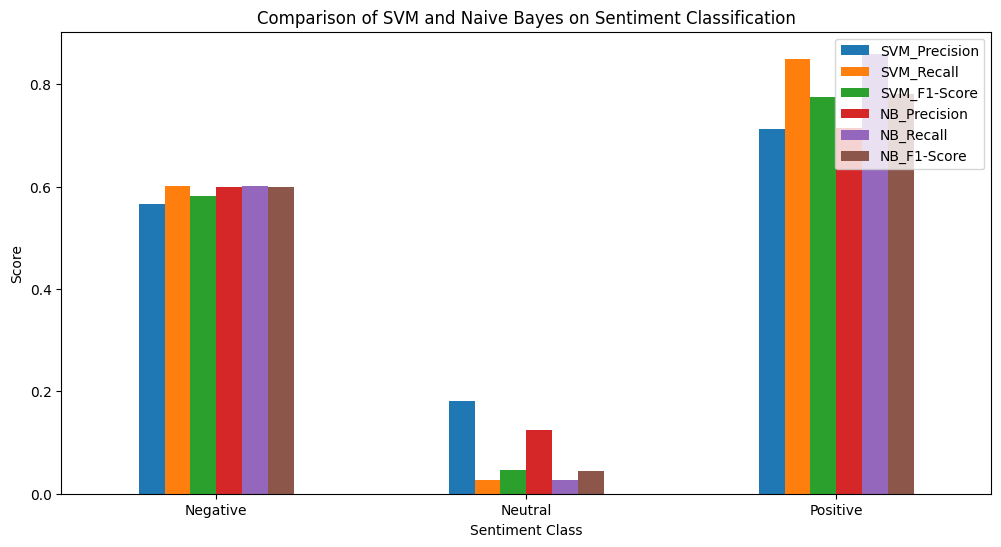

In [48]:
import pandas as pd

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'SVM_Precision': [svm_report_dict['Negative']['precision'], svm_report_dict['Neutral']['precision'], svm_report_dict['Positive']['precision']],
    'SVM_Recall': [svm_report_dict['Negative']['recall'], svm_report_dict['Neutral']['recall'], svm_report_dict['Positive']['recall']],
    'SVM_F1-Score': [svm_report_dict['Negative']['f1-score'], svm_report_dict['Neutral']['f1-score'], svm_report_dict['Positive']['f1-score']],
    'NB_Precision': [nb_report_dict['Negative']['precision'], nb_report_dict['Neutral']['precision'], nb_report_dict['Positive']['precision']],
    'NB_Recall': [nb_report_dict['Negative']['recall'], nb_report_dict['Neutral']['recall'], nb_report_dict['Positive']['recall']],
    'NB_F1-Score': [nb_report_dict['Negative']['f1-score'], nb_report_dict['Neutral']['f1-score'], nb_report_dict['Positive']['f1-score']]
}, index=['Negative', 'Neutral', 'Positive'])

import matplotlib.pyplot as plt

# Plot the comparison of Precision, Recall, and F1-Score
metrics_df.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Comparison of SVM and Naive Bayes on Sentiment Classification')
plt.ylabel('Score')
plt.xlabel('Sentiment Class')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()



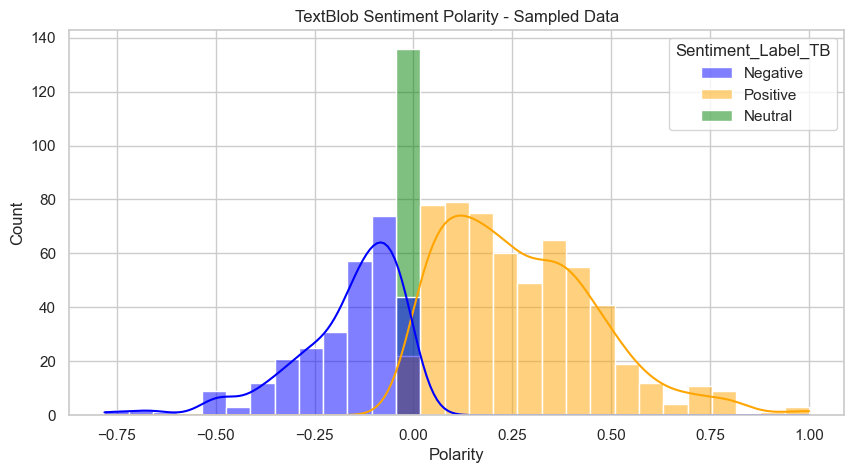

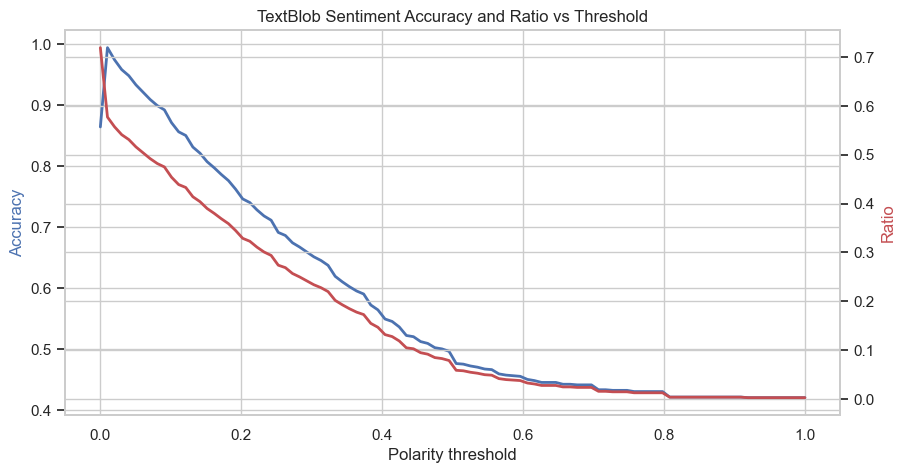

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution
plt.figure(figsize=(10, 5))

# Histogram of sentiment polarity
sns.histplot(data=df_sa, x='TextBlob_Sentiment', hue='Sentiment_Label_TB', kde=True, palette={"Positive": "orange", "Negative": "blue","Neutral":"green"})

plt.title("TextBlob Sentiment Polarity - Sampled Data")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()


# Generate accuracy and ratio based on thresholds
thresholds = np.linspace(0, 1, 100)
accuracy = []
neg_pos_ratio = []

for threshold in thresholds:
    predicted_pos = df_sa['TextBlob_Sentiment'] >= threshold
    actual_pos = df_sa['Sentiment_Label_TB'] == 'Positive'
    
    acc = (predicted_pos == actual_pos).mean()
    ratio = predicted_pos.mean()
    
    accuracy.append(acc)
    neg_pos_ratio.append(ratio)

# Plot the accuracy and ratio
fig, ax1 = plt.subplots(figsize=(10, 5))

# Accuracy plot
ax1.plot(thresholds, accuracy, 'b-', label='Accuracy (neg/pos)', linewidth=2)
ax1.set_xlabel('Polarity threshold')
ax1.set_ylabel('Accuracy', color='b')

# Share x-axis for ratio
ax2 = ax1.twinx()
ax2.plot(thresholds, neg_pos_ratio, 'r-', label='Ratio (neg/pos vs all)', linewidth=2)
ax2.set_ylabel('Ratio', color='r')

plt.title('TextBlob Sentiment Accuracy and Ratio vs Threshold')
plt.show()
